1 / input variable are numericals, the output var us categorical

2/ the best method is : The ANOVA test

**filter method for numerical variables**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
len(df)

768

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


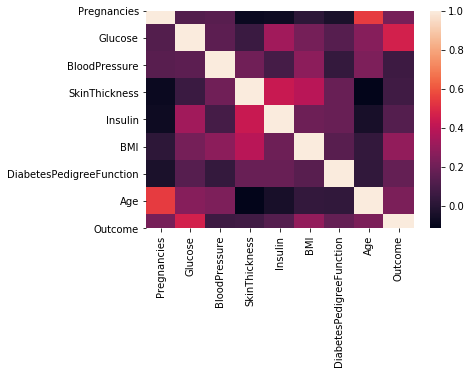

In [9]:
sns.heatmap(df.corr())

Since the output wasnt a numerical variable, the correlation doesnt allow us to see much abt the features we should keep. 

**ANOVA Test**

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:8]
y = df.iloc[:,8]

x = x.fillna (x.mean())

fs = SelectKBest (score_func = f_classif , k ="all")
f = fs.fit(x,y)

In [12]:
f.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

<BarContainer object of 8 artists>

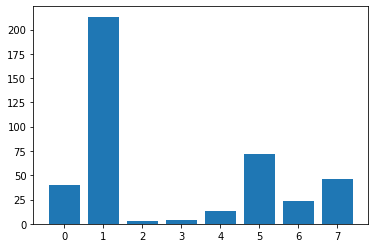

In [13]:
plt.bar([i for i in range(len(f.scores_))], f.scores_)

and we can notice the the glucose for exemple has a strong relation with our outcome.